# Effects of income, time and credit score on loan amount
## by Lone B. Tsie

## Investigation Overview


In this investigation, I wanted to look at the characteristics that determine loan amount as well as the frequency of loan recipients over the years.

## Dataset Overview

The data consisted of 113 937 loans given at Prosper over a 9 year period from 2005 to 2014. Attributes included income, credit score, date of loan, status of loan as well as monthly loan payments.

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [26]:
#data wrangling
new = loans["LoanOriginationQuarter"].str.split(" ", n = 1, expand = True)
loans["quarter"]= new[0]
loans["year"]= new[1]

In [27]:
# convert variables into ordered categorical types

# convert Income Range into ordered categorical types
income_range_var = {'IncomeRange': ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']}
for var in income_range_var:
    income_range_var = pd.api.types.CategoricalDtype(ordered = True, categories = income_range_var[var])
    loans[var] = loans[var].astype(income_range_var)
    
# convert year quarter into ordered categorical types
year_var = {'year': ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']}
for var in year_var:
    year_var = pd.api.types.CategoricalDtype(ordered = True, categories = year_var[var])
    loans[var] = loans[var].astype(year_var)
    
# convert year quarter into ordered categorical types
q_var = {'quarter': ['Q1','Q2','Q3','Q4']}
for var in q_var:
    q_var = pd.api.types.CategoricalDtype(ordered = True, categories = q_var[var])
    loans[var] = loans[var].astype(q_var)

## Distribution of Income

Income of the loan recipients ranges from 0 and unemployed till 100 000 and above. Plotted based on frequency (count), it appears that majority of recipients earn between 25 000  and 75 000, but more than that they reduces. Those who earn less that than are less likely to receive a loan.

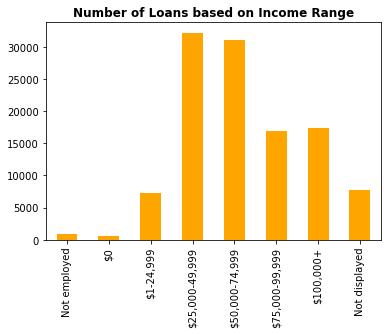

In [28]:
loans["IncomeRange"].value_counts(sort=False).plot(kind="bar", color="orange")
plt.title('Number of Loans based on Income Range', weight = 'bold')
plt.xticks(rotation=90)
plt.show()

## Distribution of loans over the years

Here the frequency of loans over the span of 10 ranging from 2005 till 2014. It is clear than frequency was climbing till 2009 where we say a sudden drop, which is consistent with the recession at that time. After which, the frequency starting increasing again, till the first quarter of 2014.

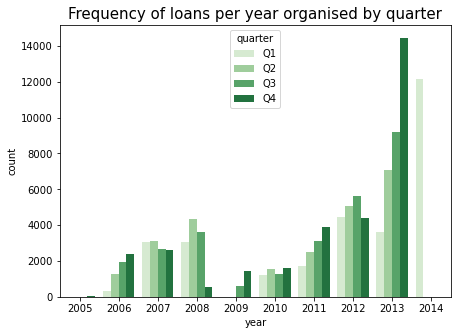

In [29]:
# year vs quarter
plt.figure(figsize = [7, 5])
sb.countplot(data = loans, x = 'year', hue = 'quarter', palette = 'Greens')
plt.title('Frequency of loans per year organised by quarter', fontsize = 15)
plt.show()

## Income by loam amount for selected loan statuses

Here we can see that income has an effect on the loan status however from further investigation the graphs show then yes a higher income is more likely to complete their loan payments but they are also similarly positively likely to default their loan. Which suggests income doesn't determine the outcome of the loan status.

In [30]:
loans_def = (loans['LoanStatus'] == 'Defaulted')
loans_1c = loans.loc[loans_def,:]
loans_com = (loans['LoanStatus'] == 'Completed')
loans_2c = loans.loc[loans_com,:]

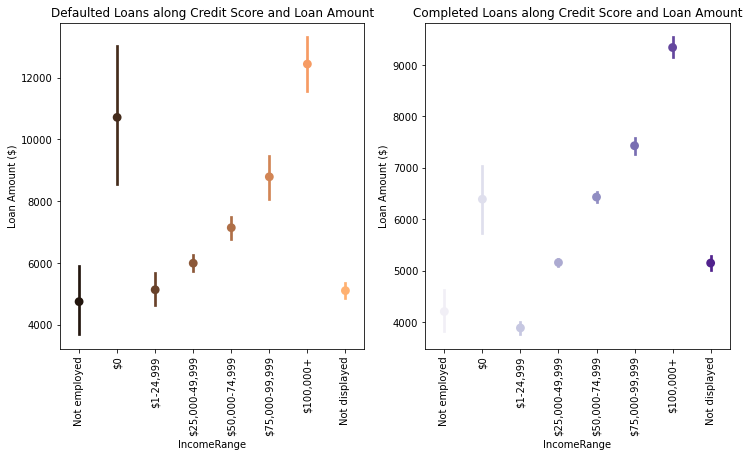

In [31]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
sb.pointplot(data = loans_1c, x = 'IncomeRange', y = 'LoanOriginalAmount',
           palette = 'copper', linestyles = '', ax = ax[0]);
ax[0].set_title('Defaulted Loans along Credit Score and Loan Amount')
ax[0].set_ylabel('Loan Amount ($)')
ax[0].tick_params(axis='x', rotation=90)
sb.pointplot(data = loans_2c, x = 'IncomeRange', y = 'LoanOriginalAmount',
           palette = 'Purples', linestyles = '', ax = ax[1]);
ax[1].set_title('Completed Loans along Credit Score and Loan Amount')
ax[1].set_ylabel('Loan Amount ($)')
plt.xticks(rotation=90)
plt.show()

In [32]:
!jupyter nbconvert Slides_TSIE.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Slides_TSIE.ipynb to slides
[NbConvertApp] Writing 649983 bytes to Slides_TSIE.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\miniconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\miniconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\miniconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User\miniconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\User\miniconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\User\miniconda3\lib\